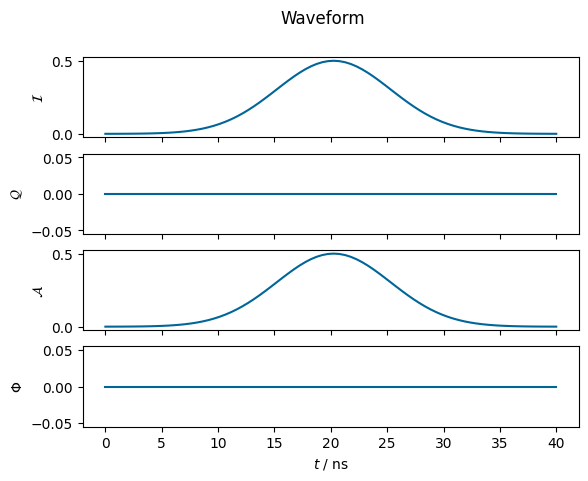

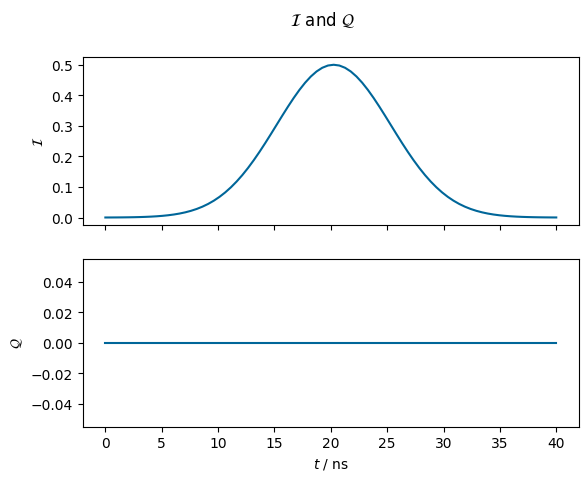

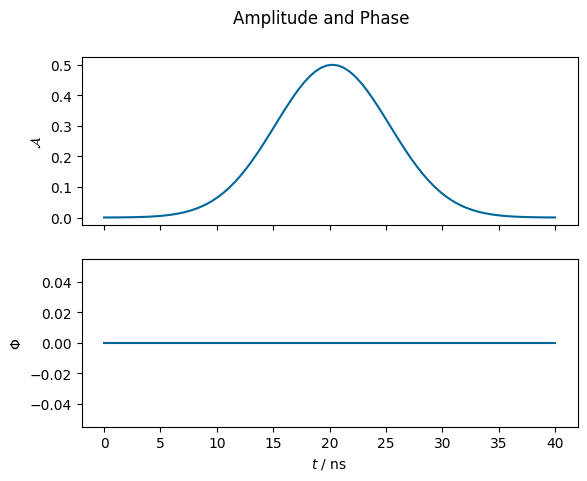

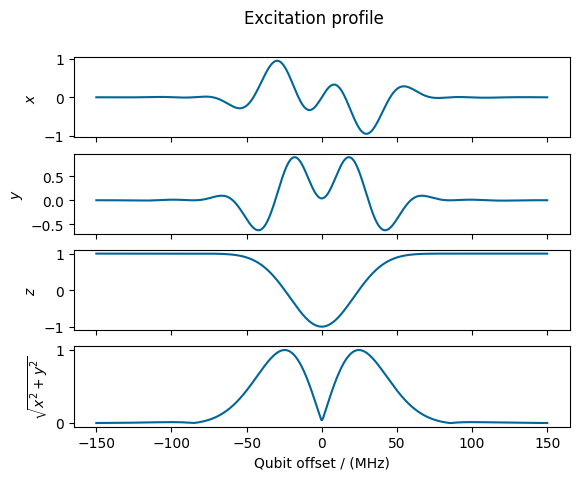

In [1]:
import numpy as np
from laboneq.dsl.experiment import pulse_library
from laboneq.contrib.bloch_simulator_pulse_plotter.inspector.update_inspect import (
    pulse_update, pulse_inspector
)

# 1) pulse 생성
pulse = pulse_library.gaussian(length=40e-9, amplitude=0.5, sigma=0.25)

# 2) 샘플링 + 파라미터 갱신
#    주의: pulse_update는 pulse.pulse_parameters를 자동으로 쓰지 않으니 넘겨주는 게 안전합니다.
pulse = pulse_update(
    pulse,
    flip_angle=180,
    spectral_window=200e6,
    pulse_parameters=pulse.pulse_parameters,
)

# 3) 플롯( IQ/Amplitude-Phase/Response )
pulse_inspector(
    pulse,
    iq=True,
    amp_phi=True,
    response=True,
    initial_state=np.array([0.0, 0.0, 1.0]),
)


In [2]:
import numpy as np
from laboneq.contrib.bloch_simulator_pulse_plotter.pulse_simulator.bloch_simulator import pulse_sim

out_state, offs = pulse_sim(
    pulse,
    n_qubits=1000,
    initial_state=np.array([0.0, 0.0, 1.0]),
)
